In [1]:
#Импорты библиотек
import pandas as pd
import numpy  as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.utils.class_weight import compute_class_weight
from func import analize_df, replace_outliers, find_outliers
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Загрузить датасет в Python.

df = pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
analize_df(df)

dtypes
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object
shape
(100000, 9)
isnull
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
value_counts



gender 3 !!!!!!!!!!!!!!!!!!!!!!/
gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64



age 102 !!!!!!!!!!!!!!!!!!!!!!/
age
80.00    5621
51.00    1619
47.00    1574
48.00    1568
53.00    1542
         ... 
0.48       83
1.00       83
0.40       66
0.16       59
0.08       36
Name: count, Length: 102, dtype: int64



hypertension 2 !!!!!!!!!!!!!!!!!!!!!!/
hypertension
0    92515
1     748

In [4]:
# убрать дубликаты
df=df.drop_duplicates()

age


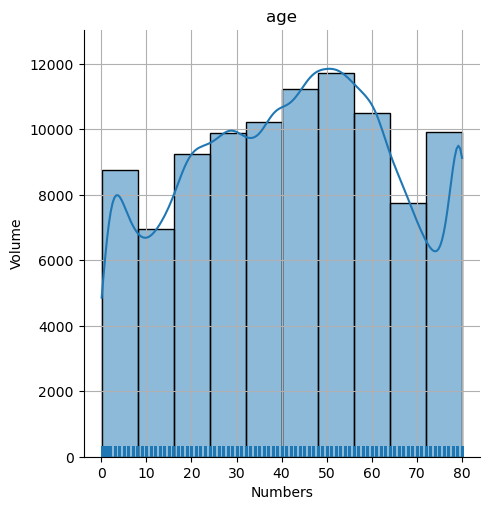

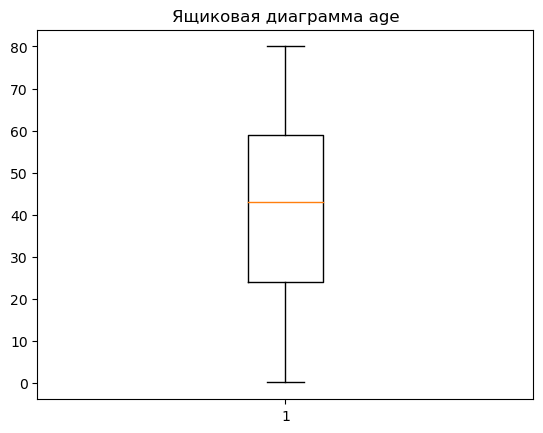

0.08 24.0 41.79432571297817 59.0 80.0
Межквартильный размах: -28.5 111.5




bmi


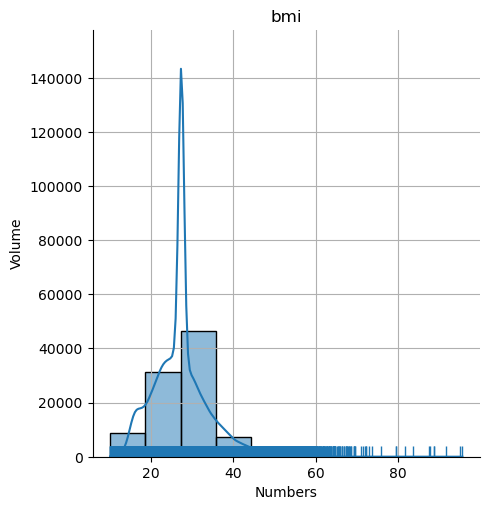

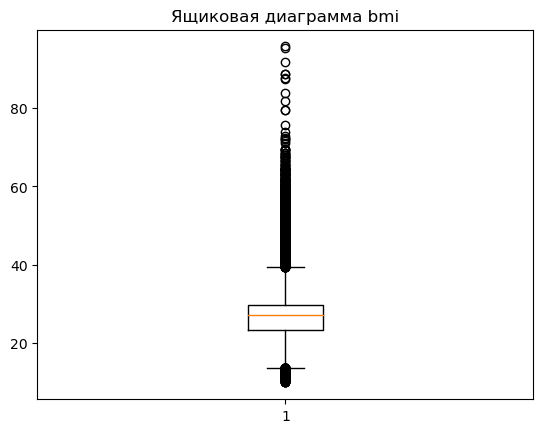

10.01 23.4 27.32146111122668 29.86 95.69
Межквартильный размах: 13.709999999999997 39.55




HbA1c_level


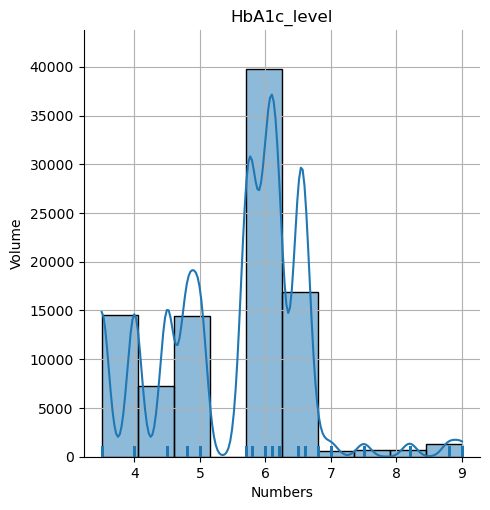

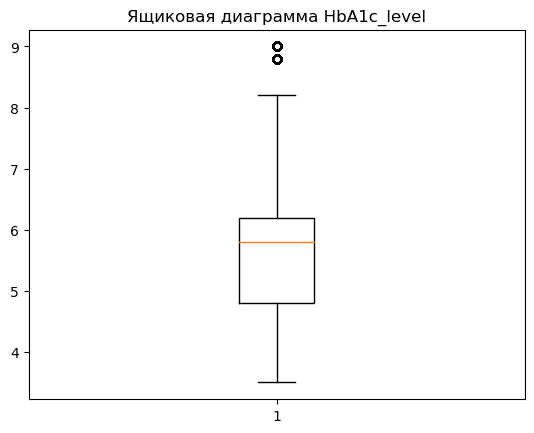

3.5 4.8 5.532608740873255 6.2 9.0
Межквартильный размах: 2.6999999999999993 8.3




blood_glucose_level


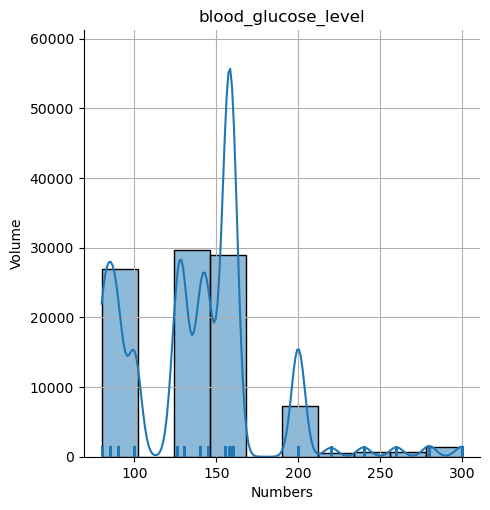

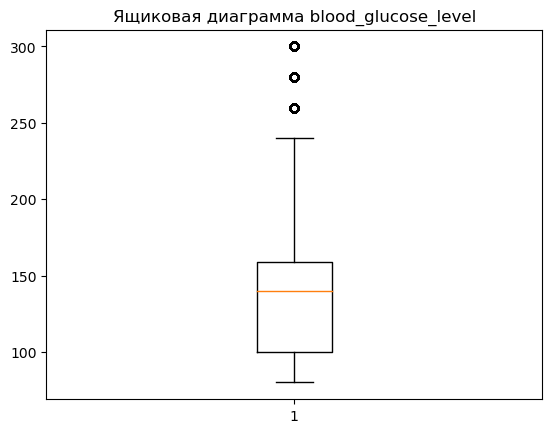

80.0 100.0 138.21823060761758 159.0 300.0
Межквартильный размах: 11.5 247.5






,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [5]:
#поиск выбросов
index_array=['age','bmi','HbA1c_level','blood_glucose_level']

find_outliers(index_array, df)

In [6]:
replace_outliers('bmi', 14.705, 38.505, df)
replace_outliers('HbA1c_level', 2.7, 8.3, df)
replace_outliers('blood_glucose_level', 80.0, 247.5, df)
df.head()

bmi
low 1.1659351403074492
high 6.204106255070414
all 7.370041395377863
HbA1c_level
low 0.0
high 1.3645913506542133
all 1.3645913506542133
blood_glucose_level
low 0.0
high 2.1124123728496245
all 2.1124123728496245


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_outlier,HbA1c_level_outlier,blood_glucose_level_outlier
0,Female,80.0,0,1,never,25.19,6.6,140.0,0,0,0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0,0,0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0,0,0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0,0,0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0,0,0,0


In [7]:
for i in (index_array):
    df[i]=df[i]/df[i].max()


In [8]:
#Приводим текстовые переменные в понятный модели формат
index_array=['smoking_history','gender']
for i in (index_array):
    if len(df[i].unique())==2:
        df[i] = np.where(df[i] == df[i].mode()[0], 0, 1)
    else:
        df=df.join(pd.get_dummies(df[i])).drop(i, axis=1)
    #k=df[i].value_counts().index.tolist()
    #df=df.join(pd.get_dummies(df[i])).drop(i, axis=1)
    #for ii in (k):
    #    df=df.rename(columns={ii: i+"_"+ii})
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_outlier,HbA1c_level_outlier,blood_glucose_level_outlier,No Info,current,ever,former,never,not current,Female,Male,Other
0,1.000,0,1,0.654201,0.795181,0.565657,0,0,0,0,False,False,False,False,True,False,True,False,False
1,0.675,0,0,0.709518,0.795181,0.323232,0,0,0,0,True,False,False,False,False,False,True,False,False
2,0.350,0,0,0.709518,0.686747,0.638384,0,0,0,0,False,False,False,False,True,False,False,True,False
3,0.450,0,0,0.609012,0.602410,0.626263,0,0,0,0,False,True,False,False,False,False,True,False,False
4,0.950,1,1,0.523049,0.578313,0.626263,0,0,0,0,False,True,False,False,False,False,False,True,False


<Axes: >

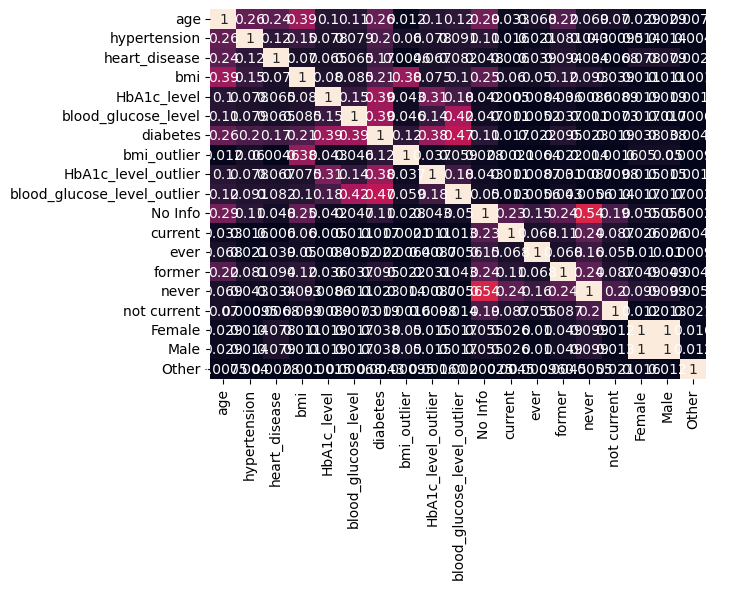

In [9]:
#построение корреляционной матрицы.
corrr=df.corr().abs()

sns.heatmap(corrr, annot=True, cbar= False)

In [10]:
target='diabetes'
corrr[target]

age                            0.264927
hypertension                   0.195710
heart_disease                  0.170711
bmi                            0.210900
HbA1c_level                    0.390543
blood_glucose_level            0.391470
diabetes                       1.000000
bmi_outlier                    0.119705
HbA1c_level_outlier            0.378135
blood_glucose_level_outlier    0.472266
No Info                        0.112576
current                        0.017037
ever                           0.021915
former                         0.095492
never                          0.023136
not current                    0.018921
Female                         0.037763
Male                           0.037883
Other                          0.004256
Name: diabetes, dtype: float64

In [11]:

y=df[target]
x=df.drop(target, axis=1)
x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,bmi_outlier,HbA1c_level_outlier,blood_glucose_level_outlier,No Info,current,ever,former,never,not current,Female,Male,Other
0,1.000,0,1,0.654201,0.795181,0.565657,0,0,0,False,False,False,False,True,False,True,False,False
1,0.675,0,0,0.709518,0.795181,0.323232,0,0,0,True,False,False,False,False,False,True,False,False
2,0.350,0,0,0.709518,0.686747,0.638384,0,0,0,False,False,False,False,True,False,False,True,False
3,0.450,0,0,0.609012,0.602410,0.626263,0,0,0,False,True,False,False,False,False,True,False,False
4,0.950,1,1,0.523049,0.578313,0.626263,0,0,0,False,True,False,False,False,False,False,True,False


In [12]:
#Разбить выборку на обучающую и тестовую.
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=False)#,random_state=True)#
x_test.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,bmi_outlier,HbA1c_level_outlier,blood_glucose_level_outlier,No Info,current,ever,former,never,not current,Female,Male,Other
79455,0.70,0,0,0.922218,0.578313,0.363636,0,0,0,False,False,False,False,True,False,True,False,False
79456,0.75,0,0,0.607194,0.722892,0.642424,0,0,0,True,False,False,False,False,False,True,False,False
79457,1.00,1,0,0.574731,0.578313,0.509091,0,0,0,True,False,False,False,False,False,False,True,False
79458,0.50,0,0,1.000000,0.421687,0.626263,1,0,0,True,False,False,False,False,False,True,False,False
79460,0.85,0,0,0.581483,0.578313,0.808081,0,0,0,False,False,False,False,False,True,True,False,False


In [13]:
#Бинарная логистическая регрессия;

In [14]:
clf = LinearRegression()
clf.fit(x_train, y_train)
ypred= clf.predict((x_test))

ypred=(ypred>0.65)

In [15]:
print('Бинарная логистическая регрессия;')
print(classification_report(y_test,ypred))

Бинарная логистическая регрессия;
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     17522
           1       1.00      0.35      0.52      1708

    accuracy                           0.94     19230
   macro avg       0.97      0.68      0.75     19230
weighted avg       0.95      0.94      0.93     19230



In [16]:
#Деревья принятия решений (DTS) 

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(x_train, y_train)
ypred2= clf2.predict(x_test)

In [17]:
print('#Деревья принятия решений (DTS) ')
print(classification_report(y_test,ypred2))

#Деревья принятия решений (DTS) 
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     17522
           1       0.71      0.75      0.73      1708

    accuracy                           0.95     19230
   macro avg       0.84      0.86      0.85     19230
weighted avg       0.95      0.95      0.95     19230



Text(0.5, 1.0, 'Сравнение показателей')

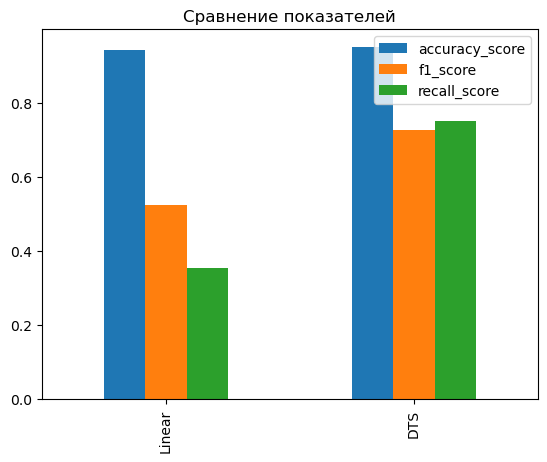

In [18]:
plotdata = pd.DataFrame({
    "accuracy_score":[accuracy_score(y_test,ypred), accuracy_score(y_test,ypred2)],
    "f1_score":[f1_score(y_test,ypred), f1_score(y_test,ypred2)],
    "recall_score":[recall_score(y_test,ypred), recall_score(y_test,ypred2)]
    }, 
    index=["Linear", "DTS"]
)
plotdata.plot(kind="bar")
plt.title("Сравнение показателей")

C учётом дисбаланса между классами

In [19]:


# Получение весов классов
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)

In [20]:
#Деревья принятия решений (DTS)
# Создание модели с весами классов
clf3 = DecisionTreeClassifier(class_weight=dict(enumerate(class_weights)))

clf3 = clf3.fit(x_train, y_train)
ypred3= clf3.predict(x_test)

In [21]:
#Показатель f1-score стал чуть лучше
print('#Деревья принятия решений (DTS) с учётом дисбаланса между классами.')
print(classification_report(y_test,ypred3))

#Деревья принятия решений (DTS) с учётом дисбаланса между классами.
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17522
           1       0.73      0.73      0.73      1708

    accuracy                           0.95     19230
   macro avg       0.85      0.85      0.85     19230
weighted avg       0.95      0.95      0.95     19230



Cost-sensitive learning

In [22]:
#Было
class_weights

array([0.5483779 , 5.66764914])

In [23]:
#Стало. Главное - не переборщить, а то всех в больных запишем
class_weights2 = {0: 0.0009, 1: 10000}#{0: 0.49, 1: 1820000}#{0: class_weights[0], 1: class_weights[1]*1820000}
class_weights2

{0: 0.0009, 1: 10000}

In [24]:
#Деревья принятия решений (DTS)
# Создание модели с пользовательскими весами классов
clf4 = DecisionTreeClassifier(class_weight=class_weights2)

clf4 = clf4.fit(x_train, y_train)
ypred4= clf4.predict(x_test)

In [25]:
#Чаще заворачиваем людей на проверку , но и пропускаем реже
print('#Деревья принятия решений (DTS) с Cost-sensitive learning.')
print(classification_report(y_test,ypred4))

#Деревья принятия решений (DTS) с Cost-sensitive learning.
              precision    recall  f1-score   support

           0       0.98      0.95      0.97     17522
           1       0.62      0.78      0.69      1708

    accuracy                           0.94     19230
   macro avg       0.80      0.87      0.83     19230
weighted avg       0.95      0.94      0.94     19230



Нанлядные сравнения

Text(0.5, 1.0, 'Сравнение показателей')

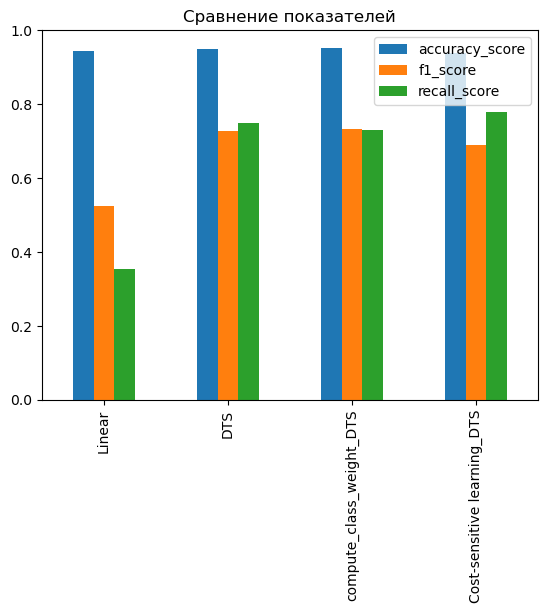

In [26]:
index=["Linear", "DTS", "compute_class_weight_DTS", "Cost-sensitive learning_DTS"]
plotdata = pd.DataFrame({
    "accuracy_score":[ accuracy_score(y_test,ypred), accuracy_score(y_test,ypred2), accuracy_score(y_test,ypred3), accuracy_score(y_test,ypred4)],
    "f1_score":[f1_score(y_test,ypred), f1_score(y_test,ypred2), f1_score(y_test,ypred3), f1_score(y_test,ypred4)],
    "recall_score":[recall_score(y_test,ypred), recall_score(y_test,ypred2), recall_score(y_test,ypred3), recall_score(y_test,ypred4)]
    }, 
    index=index
)
plotdata.plot(kind="bar")
plt.title("Сравнение показателей")

In [27]:
y_test_diabet_number=sum(y_test)
ypred_arr=[ypred, ypred2, ypred3, ypred4]
print('"Лишних" напралений - насколько больше пациентов необходимо проверить врачам по сравнению с идеальным диагнозом:')
for i in range (len(index)):
    print(index[i], sum(ypred_arr[i])-y_test_diabet_number)

"Лишних" напралений - насколько больше пациентов необходимо проверить врачам по сравнению с идеальным диагнозом:
Linear -1103
DTS 105
compute_class_weight_DTS -6
Cost-sensitive learning_DTS 437


In [28]:
#Возвращаемся к наглядным параметрам
df = pd.read_csv('diabetes_prediction_dataset.csv')
for i in (['hypertension','heart_disease','diabetes']):
    df[i] = np.where(df[i] == 1, 'Есть', 'Нет')

ypred = np.where(ypred, 'Есть', 'Нет')
ypred2 = np.where(ypred2, 'Есть', 'Нет')
ypred3 = np.where(ypred3, 'Есть', 'Нет')
ypred4 = np.where(ypred4, 'Есть', 'Нет')

In [29]:
#Смотрим случаи и прогнозы
c=-1#k
for i in (y_test.index):
    c+=1
    patient=df.iloc[i]
    print('№',c,'Пол:',patient['gender'],'Возраст:',patient['age'],'гипертония:',patient['hypertension'],'сердечная болезнь:',
          patient['heart_disease'], 'Курящий:',patient['smoking_history'],'bmi:',patient['bmi'],'HbA1c_level:',patient['HbA1c_level'],
          'уровень глюкозы в крови:', patient['blood_glucose_level'],'Диабет (истина):',patient['diabetes'],'Диабет (linear):',
          ypred2[c],'Диабет (dts):', ypred2[c],'Диабет (dts_compute_class_weight):',ypred3[c],
          'Диабет (Cost-sensitive learning):',ypred4[c])
    print('')
    

№ 0 Пол: Female Возраст: 56.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 35.51 HbA1c_level: 4.8 уровень глюкозы в крови: 90 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 1 Пол: Female Возраст: 60.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 23.38 HbA1c_level: 6.0 уровень глюкозы в крови: 159 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2 Пол: Male Возраст: 80.0 гипертония: Есть сердечная болезнь: Нет Курящий: No Info bmi: 22.13 HbA1c_level: 4.8 уровень глюкозы в крови: 126 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 3 Пол: Female Возраст: 40.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 39.98 HbA1c_level: 3.5 уровень глюкозы в крови: 155 Диабет (истина): Н

№ 1034 Пол: Female Возраст: 16.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 21.85 HbA1c_level: 6.0 уровень глюкозы в крови: 126 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 1035 Пол: Female Возраст: 77.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 22.32 HbA1c_level: 4.8 уровень глюкозы в крови: 145 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 1036 Пол: Male Возраст: 37.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 27.32 HbA1c_level: 3.5 уровень глюкозы в крови: 200 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 1037 Пол: Female Возраст: 61.0 гипертония: Есть сердечная болезнь: Нет Курящий: never bmi: 32.88 HbA1c_level: 4.0 уровень глюкозы в крови: 200 Диабет 

№ 2102 Пол: Female Возраст: 34.0 гипертония: Нет сердечная болезнь: Нет Курящий: current bmi: 27.32 HbA1c_level: 6.5 уровень глюкозы в крови: 126 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2103 Пол: Female Возраст: 35.0 гипертония: Нет сердечная болезнь: Нет Курящий: former bmi: 25.46 HbA1c_level: 5.8 уровень глюкозы в крови: 155 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2104 Пол: Male Возраст: 63.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 30.7 HbA1c_level: 6.0 уровень глюкозы в крови: 100 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2105 Пол: Male Возраст: 80.0 гипертония: Нет сердечная болезнь: Нет Курящий: former bmi: 27.35 HbA1c_level: 4.0 уровень глюкозы в крови: 159 Диабет (и

№ 2780 Пол: Female Возраст: 8.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 16.43 HbA1c_level: 6.5 уровень глюкозы в крови: 158 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2781 Пол: Male Возраст: 14.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 27.5 HbA1c_level: 6.1 уровень глюкозы в крови: 200 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2782 Пол: Female Возраст: 56.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 20.58 HbA1c_level: 6.6 уровень глюкозы в крови: 200 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 2783 Пол: Female Возраст: 45.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 26.17 HbA1c_level: 4.0 уровень глюкозы в крови: 140 Диабет (истина

№ 4021 Пол: Female Возраст: 61.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 27.17 HbA1c_level: 6.5 уровень глюкозы в крови: 160 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 4022 Пол: Female Возраст: 30.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 27.75 HbA1c_level: 6.1 уровень глюкозы в крови: 160 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Есть Диабет (Cost-sensitive learning): Нет

№ 4023 Пол: Female Возраст: 59.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 24.8 HbA1c_level: 4.0 уровень глюкозы в крови: 145 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 4024 Пол: Male Возраст: 28.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 25.72 HbA1c_level: 5.8 уровень глюкозы в крови: 90 Диабет (ист

№ 4651 Пол: Female Возраст: 38.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 18.63 HbA1c_level: 6.1 уровень глюкозы в крови: 140 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 4652 Пол: Male Возраст: 35.0 гипертония: Нет сердечная болезнь: Нет Курящий: current bmi: 27.32 HbA1c_level: 5.0 уровень глюкозы в крови: 80 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 4653 Пол: Male Возраст: 45.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 32.36 HbA1c_level: 4.5 уровень глюкозы в крови: 159 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 4654 Пол: Female Возраст: 56.0 гипертония: Нет сердечная болезнь: Нет Курящий: former bmi: 38.0 HbA1c_level: 5.7 уровень глюкозы в крови: 126 Диабет (ист

№ 5971 Пол: Male Возраст: 60.0 гипертония: Есть сердечная болезнь: Нет Курящий: never bmi: 24.72 HbA1c_level: 6.0 уровень глюкозы в крови: 80 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 5972 Пол: Female Возраст: 4.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 15.34 HbA1c_level: 4.5 уровень глюкозы в крови: 155 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 5973 Пол: Male Возраст: 3.0 гипертония: Нет сердечная болезнь: Нет Курящий: No Info bmi: 16.69 HbA1c_level: 3.5 уровень глюкозы в крови: 100 Диабет (истина): Нет Диабет (linear): Нет Диабет (dts): Нет Диабет (dts_compute_class_weight): Нет Диабет (Cost-sensitive learning): Нет

№ 5974 Пол: Female Возраст: 23.0 гипертония: Нет сердечная болезнь: Нет Курящий: never bmi: 27.16 HbA1c_level: 4.5 уровень глюкозы в крови: 126 Диабет (исти

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)





Выводы:
Учитывая характер задачи наиболее приоритетным является точное определение положительных случаев, так как цена ошибки в этом случае выше по сравнению с ложным диагнозом. Исходя из этого наиболее приоритетным параметром для нас является recall (кол-во правильно определённых позитивных делённое на общее кол-во позитивных). Так что деревья принятия решений в данной задаче более оптимальны. Веса классов необходимо выставить в соответствии с тем какой ожидаем сверх-поток посетителей (из ложно больных) допустим
